In [40]:
#cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

In [41]:
cd /home/roberto/Desktop/romain_ic/wavemixing_project/src

/home/roberto/Desktop/romain_ic/wavemixing_project/src


In [42]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonean_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [43]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonean_builder import *
from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from single_and_double_excitations_subspace.QRT_dynamics_ODE import *

from post_processing.local_calculations import *
from helper_functions.cloud import *
from helper_functions.operators import *
from helper_functions.other import * 

In [44]:
N = 4
N_atoms = N

b0 = 0.1

repeat = False
if repeat == False:
    r = random_cloud(0, N, exc_radius = None, b0 = b0)

In [45]:
r1, r2 = np.array([[-5.15532159], [-1.01853261], [0.95664644]]), np.array([[-3.13364512], [-0.22723283], [2.54200667]]) 
#r = np.array([r1,r2])

### Subspace solutions

In [46]:
R1 = get_nhat_from_angle(25)
R2 = get_nhat_from_angle(205)

tf = 1
Omega = 2
Delta = 20
t_span, dt = np.linspace(0,tf,100, retstep = True) 

Exact

In [47]:
taulist = t_span 

S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r)
rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)


g2_12_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
g2_21_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R2, R1, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
g2_22_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R2, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
g2_11_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R1, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)


b0 system None
kd system None
r is an array


QRT

In [48]:
S_sigmam_i_expectations = None
S_sigmam_ij_expectations = None
Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)
Beta1D, Beta2D, t_span, r = SolveForBeta1DandBeta2D_tau_QRT(N, kd = None , b0 = None, exc_radius = None, Delta = Delta , Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, taulist=t_span, Sm_1D = S_sigmam_i_expectations, Sm_2D = S_sigmam_ij_expectations )  

g2_12_QRT = np.zeros_like(t_span)
g2_21_QRT = np.zeros_like(t_span)
g2_22_QRT = np.zeros_like(t_span)
g2_11_QRT = np.zeros_like(t_span)

for t in range(len(t_span)):
        g2_12_QRT[t] = np.real(g2_of_zero_subspace_approach(r, R1, R2, Beta1D[t], Beta2D[t]))
        g2_21_QRT[t] = np.real(g2_of_zero_subspace_approach(r, R2, R1, Beta1D[t], Beta2D[t]))
        g2_22_QRT[t] = np.real(g2_of_zero_subspace_approach(r, R2, R2, Beta1D[t], Beta2D[t]))
        g2_11_QRT[t] = np.real(g2_of_zero_subspace_approach(r, R1, R1, Beta1D[t], Beta2D[t]))

Mixed correlation

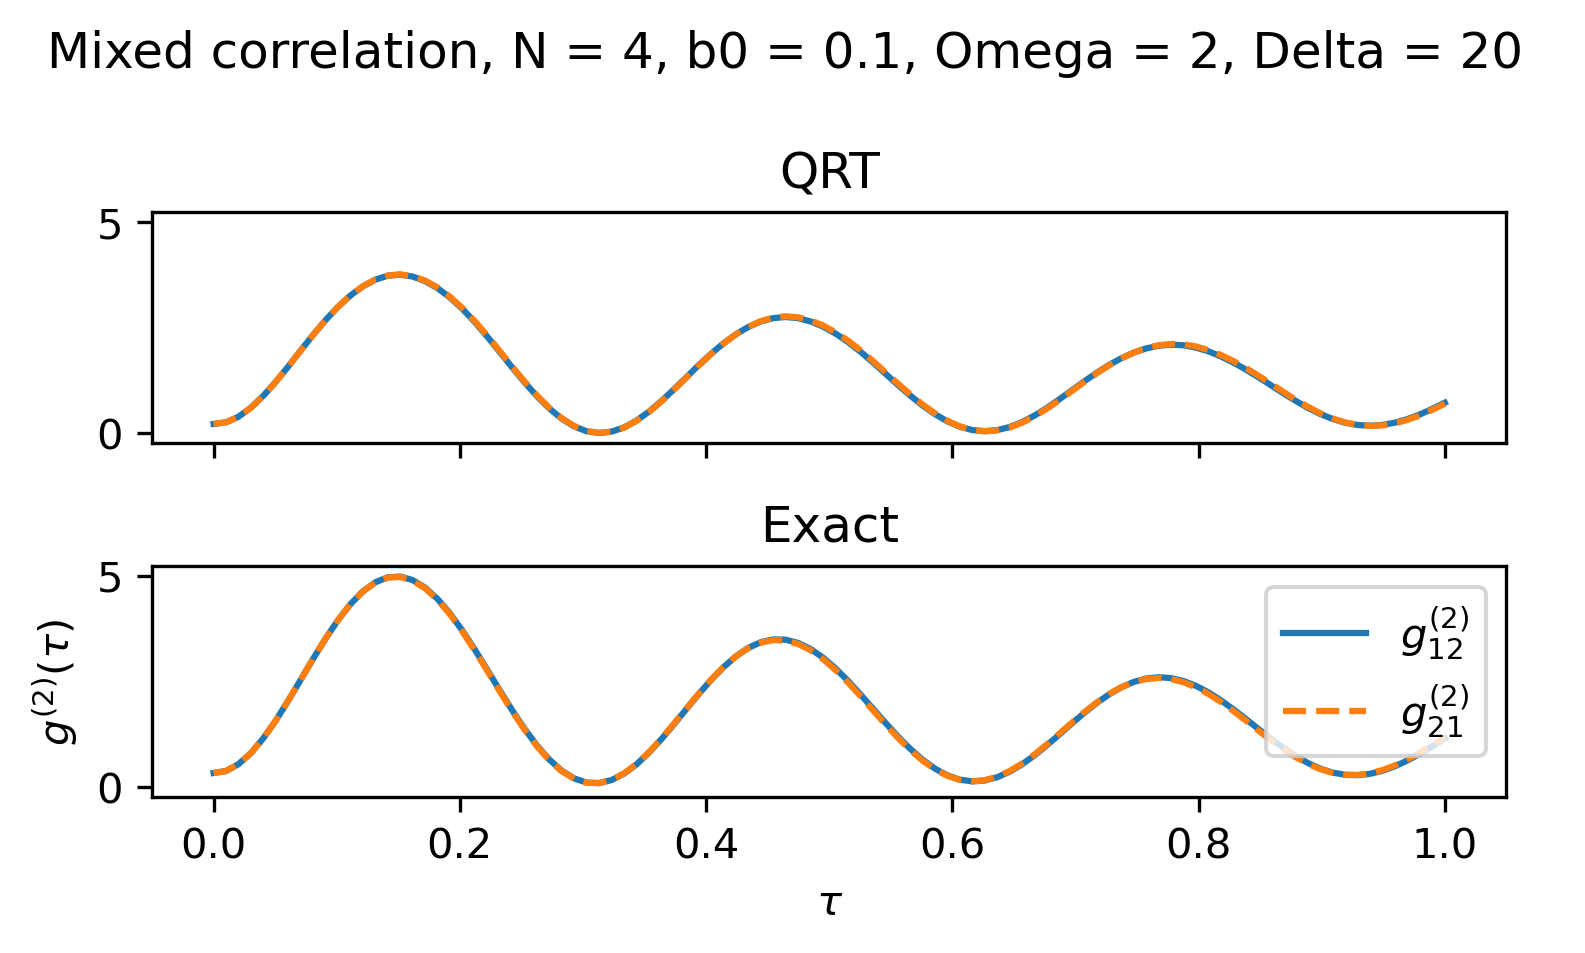

In [54]:
#fig = plt.figure(figsize=(5, 3), dpi=300)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3), dpi=300, sharex=True, sharey=True)

#plt.ylim(-0.2,14)
ax1.set_title("QRT")
ax1.plot(t_span, g2_12_QRT, label = '$g^{(2)}_{12}$')
ax1.plot(t_span, g2_21_QRT, "--", label = "$g^{(2)}_{21}$")

ax2.set_title("Exact")
ax2.plot(t_span, g2_12_exact, label = '$g^{(2)}_{12}$')
ax2.plot(t_span, g2_21_exact, "--", label = "$g^{(2)}_{21}$")



plt.suptitle(f"Mixed correlation, N = {N}, b0 = {b0}, Omega = {Omega}, Delta = {Delta}  ")

plt.tight_layout()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$ g^{(2)}(\tau)  $")
plt.legend()

Auto correlation

g2_11(0) QRT =  1.1592017062573508
g2_22(0) QRT =  1.1489465121892481
g2_11(0) exact =  1.4451203092442069
g2_22(0) exact =  1.434433144260557


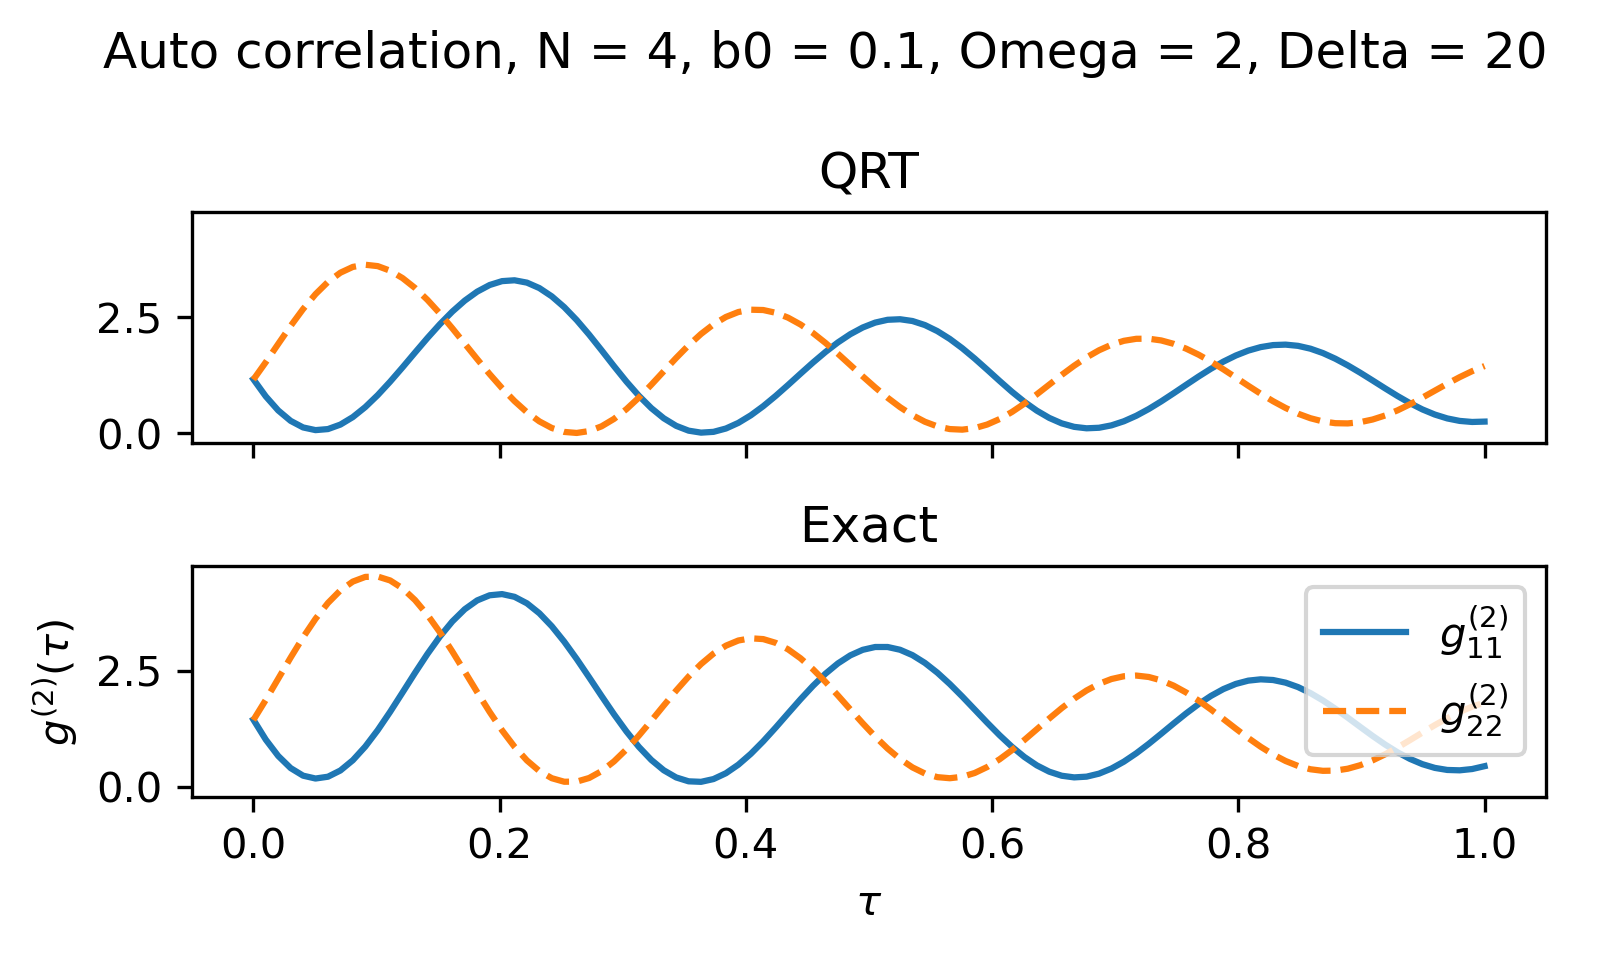

In [55]:
#fig = plt.figure(figsize=(5, 3), dpi=300)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3), dpi=300, sharex=True, sharey=True)

#plt.ylim(-0.2,14)
ax1.set_title("QRT")
ax1.plot(t_span, g2_11_QRT, label = '$g^{(2)}_{11}$')
ax1.plot(t_span, g2_22_QRT, "--", label = "$g^{(2)}_{22}$")
print("g2_11(0) QRT = ", g2_11_QRT[0])
print("g2_22(0) QRT = ", g2_22_QRT[0])



ax2.set_title("Exact")
ax2.plot(t_span, g2_11_exact, label = '$g^{(2)}_{11}$')
ax2.plot(t_span, g2_22_exact, "--", label = "$g^{(2)}_{22}$")

print("g2_11(0) exact = ", g2_11_exact[0])
print("g2_22(0) exact = ", g2_22_exact[0])




plt.suptitle(f"Auto correlation, N = {N}, b0 = {b0}, Omega = {Omega}, Delta = {Delta}  ")

plt.tight_layout()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$ g^{(2)}(\tau)  $")
plt.legend()

Conclusion, for Cauchy-Schwarz, we  only have to calculate $g^{(2)}_{21}$ and $g^{(2)}_{11}$,  as $g^{(2)}_{12}(\tau) = g^{(2)}_{21}(\tau) $ and  $g^{(2)}_{11}(0) = g^{(2)}_{22}(0)$  

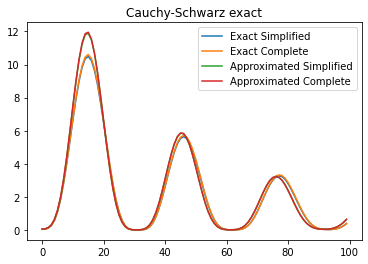

In [62]:
plt.title("Cauchy-Schwarz exact")
plt.plot( g2_12_QRT*g2_12_QRT/(g2_11_QRT[0]*g2_11_QRT[0]), label = "Exact Simplified")
plt.plot( g2_12_QRT*g2_21_QRT/(g2_11_QRT[0]*g2_22_QRT[0]), label = "Exact Complete")

plt.plot( g2_12_exact*g2_12_exact/(g2_11_exact[0]*g2_11_exact[0]), label = "Approximated Simplified")
plt.plot( g2_12_exact*g2_21_exact/(g2_11_exact[0]*g2_22_exact[0]), label = "Approximated Complete")


plt.legend()

In [51]:
#plt.savefig(f"./benchmarking/g2_exactQRT_run{str(sigma_ij[0][0][1])[6:8]}.jpg")
#fig.tight_layout()